# Product churn

## Importing the libraries 

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [47]:
df = pd.read_csv("../staging/data_set/cleaned_product.csv")

## Prepare data

In [48]:
df["score_date"] = pd.to_datetime(df["score_date"], errors="coerce")

df["year_month"] = df["score_date"].dt.to_period("M").astype(str)

df.sort_values(["id", "year_month"], inplace=True)

## Compute Churn for Each Product Subscription

In [49]:
def compute_churn(df, col):
    prev = df.groupby("id")[col].shift(1)
    churn = ((prev == 1) & (df[col] == 0)).astype(int)
    return churn


df["team_churn"] = compute_churn(df, "team_plus")
df["pro_churn"] = compute_churn(df, "pro_plus")
df["ent_churn"] = compute_churn(df, "ent_plus")

## Aggregate Monthly Product Churn

In [50]:
monthly_churn = (
    df.groupby("year_month")[["team_churn", "pro_churn", "ent_churn"]]
    .sum()
    .reset_index()
)

## Visualization

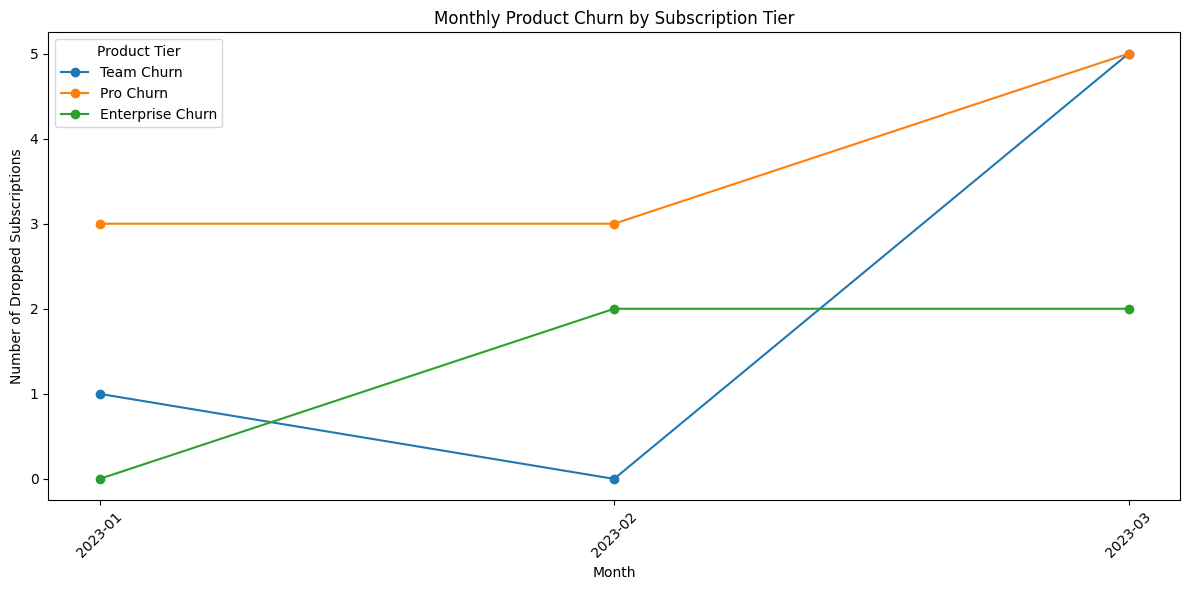

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_churn["year_month"],
    monthly_churn["team_churn"],
    marker="o",
    label="Team Churn",
)
plt.plot(
    monthly_churn["year_month"],
    monthly_churn["pro_churn"],
    marker="o",
    label="Pro Churn",
)
plt.plot(
    monthly_churn["year_month"],
    monthly_churn["ent_churn"],
    marker="o",
    label="Enterprise Churn",
)

plt.xlabel("Month")
plt.ylabel("Number of Dropped Subscriptions")
plt.title("Monthly Product Churn by Subscription Tier")
plt.xticks(rotation=45)
plt.legend(title="Product Tier")
plt.tight_layout()
plt.show()